In [6]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("cleaned_data.csv")
y = df.price
X = df.drop('price', axis=1)

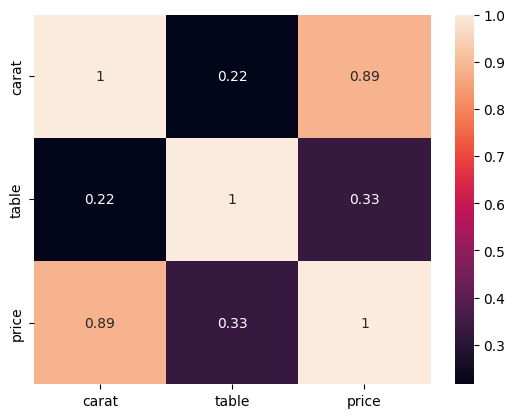

In [7]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True);

In [8]:
X_dummies = pd.get_dummies(X)
X_dummies

,carat,table,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VVS1,clarity_VVS2,color_Colorless,color_Near colorless,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very good
0,0.50,56.860759,0,1,0,0,0,0,1,0,0,0,1,0,0
1,0.70,59.000000,0,0,0,0,0,1,1,0,0,0,0,1,0
2,0.49,56.000000,0,0,0,1,0,0,0,1,0,1,0,0,0
3,1.20,58.000000,0,1,0,0,0,0,1,0,0,0,1,0,0
4,0.90,56.860759,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.95,56.000000,0,0,1,0,0,0,0,1,0,0,1,0,0
186,0.45,59.000000,0,0,1,0,0,0,1,0,0,0,0,0,1
187,1.25,55.000000,0,0,0,0,0,1,0,1,0,1,0,0,0
188,0.85,58.000000,0,0,0,1,0,0,1,0,1,0,0,0,0


In [9]:
Xd = sm.add_constant(X_dummies)
model = sm.OLS(y, X_dummies).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     93.07
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           9.02e-70
Time:                        16:53:09   Log-Likelihood:                -1607.0
No. Observations:                 190   AIC:                             3240.
Df Residuals:                     177   BIC:                             3282.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
carat                 8807.0934    300.498     29.308      0.000    8214.073    9400.113
table                  160.2069     73.866      2.169      0.031      14.436     305.978
clarity_I1           -3379.5421    794.689     -4.253      0.000   -4947.827   -1811.257
clarity_IF           -1404.3772    851.422     -1.649      0.101   -3084.622     275.868
clarity_SI1          -2367.9408    836.752     -2.830      0.005   -4019.236    -716.646
clarity_SI2          -2426.9899    802.097     -3.026      0.003   -4009.894    -844.086
clarity_VVS1         -1486.7729    822.579     -1.807      0.072   -3110.098     136.552
clarity_VVS2         -1482.7368    838.722     -1.768      0.079   -3137.919     172.446
color_Colorless      -6258.4152   2398.907     -2.609      0.010    -1.1e+04   -1524.275
color_Near colorless -6289.9443   2399.724     -2.621      0.010    -1.1e+04   -1554.192
cut_Fair             -2866.0641    917.423     -3.124      0.002   -4676.559   -1055.569
cut_Good             -2805.5695    980.938     -2.860      0.005   -4741.408    -869.731
cut_Ideal            -2369.4043    984.329     -2.407      0.017   -4311.936    -426.873
cut_Premium          -1998.5092   1013.875     -1.971      0.050   -3999.347       2.329
cut_Very good        -2508.8124    983.114     -2.552      0.012   -4448.945    -568.679
==============================================================================
Omnibus:                       88.406   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.102
Skew:                          -1.698   Prob(JB):                    5.59e-105
Kurtosis:                      10.008   Cond. No.                     1.06e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.45e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, tol=0.005, direction = 'forward')
sfs.fit(X_dummies, y)
sfs.get_feature_names_out()

array(['carat', 'clarity_I1', 'clarity_SI1', 'clarity_SI2', 'cut_Premium'],
      dtype=object)

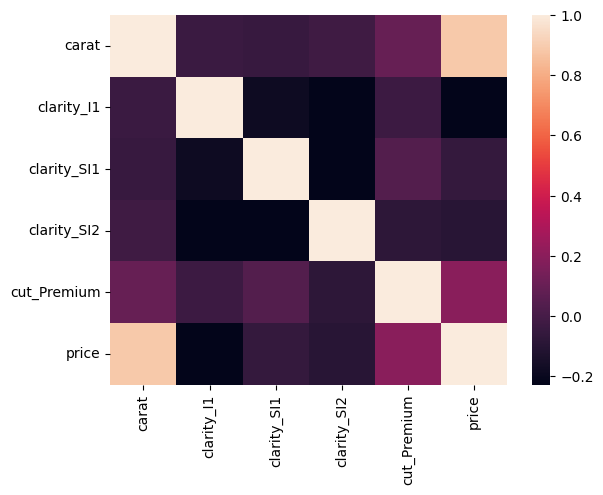

In [11]:
X_selected = X_dummies[sfs.get_feature_names_out()]
sns.heatmap(X_selected.join(y).corr());

In [33]:
X_selected.join(y).corr()

,carat,clarity_I1,clarity_SI1,clarity_SI2,cut_Premium,price
carat,1.000000,-0.038842,-0.047245,-0.024673,0.093733,0.885584
clarity_I1,-0.038842,1.000000,-0.180124,-0.226089,-0.034518,-0.227855
clarity_SI1,-0.047245,-0.180124,1.000000,-0.226089,0.037951,-0.057885
clarity_SI2,-0.024673,-0.226089,-0.226089,1.000000,-0.082310,-0.097672
cut_Premium,0.093733,-0.034518,0.037951,-0.082310,1.000000,0.196010
price,0.885584,-0.227855,-0.057885,-0.097672,0.196010,1.000000


In [32]:
Xd = sm.add_constant(X_selected)
model = sm.OLS(y, Xd).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           4.60e-75
Time:                        16:35:36   Log-Likelihood:                -1612.7
No. Observations:                 190   AIC:                             3237.
Df Residuals:                     184   BIC:                             3257.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1379.2032    274.301     -5.028      0.000   -1920.383    -838.023
carat        8941.3564    294.874     30.323      0.000    8359.587    9523.126
clarity_I1  -2068.8647    255.705     -8.091      0.000   -2573.356   -1564.373
clarity_SI1  -834.0475    255.566     -3.264      0.001   -1338.264    -329.831
clarity_SI2 -1076.4658    224.201     -4.801      0.000   -1518.800    -634.131
cut_Premium   755.1654    216.421      3.489      0.001     328.179    1182.152
==============================================================================
Omnibus:                      108.945   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              812.362
Skew:                          -2.061   Prob(JB):                    3.96e-177
Kurtosis:                      12.254   Cond. No.                         6.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""